In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
import altair as alt
import warnings
import geopandas as gpd
import eda, constants
import textwrap
warnings.filterwarnings("ignore")

In [2]:
ebird_gdf=pd.read_csv('data/final_dataset.tsv', sep='\t')
ebird_gdf = ebird_gdf[(ebird_gdf["OBSERVATION YEAR"] >= 2014) & (ebird_gdf["OBSERVATION YEAR"] <= 2023)]

In [8]:
com_areas = gpd.read_file('data/neighborhoods/geo_export_f5325bf0-9c6d-49a5-a5d9-0e5bf24fa856.shp')
df_2023 = ebird_gdf[ebird_gdf["OBSERVATION YEAR"] == 2023]
viz_df = eda.aggregate_data(df_2023,["community","COMMON NAME"])
viz_df["COUNT"] =  viz_df["COUNT"].apply(lambda x: sum(x))
viz_df = eda.aggregate_data(viz_df,["community"])
viz_df["shannon_index"] = viz_df["COUNT"].apply(eda.shannon_index)
viz_df = viz_df[["community","shannon_index"]]
gdf = com_areas.merge(viz_df, on='community')

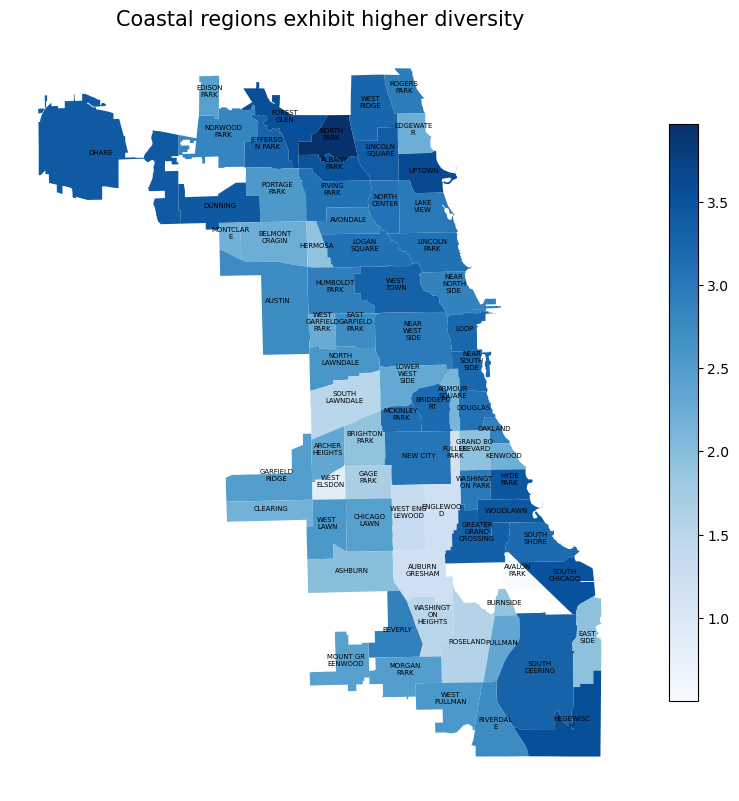

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(column='shannon_index', cmap='Blues', linewidth=0.8, ax=ax,legend=True,legend_kwds={'shrink': 0.75})
for idx, row in gdf.iterrows():
    wrapped_text = textwrap.fill(row['community'], width=8)
    plt.annotate(text=wrapped_text, xy=row.geometry.centroid.coords[0], ha='center', fontsize=5)
ax.set_title('Coastal regions exhibit higher diversity', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_axis_off()
plt.show()

In [ ]:
ebird_gdf['Season'] = ebird_gdf['OBSERVATION MONTH'].apply(eda.categorize_season)
viz_df = eda.aggregate_data(ebird_gdf,["Season","OBSERVATION YEAR","COMMON NAME"])
viz_df["COUNT"] =  viz_df["COUNT"].apply(lambda x: sum(x))
viz_df = eda.aggregate_data(viz_df,["Season","OBSERVATION YEAR"])
viz_df["shannon_index"] = viz_df["COUNT"].apply(eda.shannon_index)